일단 피처명들부터 읽어야하는데

피처 인덱스와 피처명이 스페이스로 구분되어있고, 해더가 존재하지 않는다.

일단 읽고보자

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path = "./res/UCI HAR Dataset/features.txt"

features_df = pd.read_csv(path,sep="\s+",
                         header=None, names=["column_index", "column_name"])

features_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


 여기서 column_name은 피처 데이터를 읽을때 컬럼으로 필요하니 리스트로 변환하자

In [9]:
feature_names = features_df["column_name"].values.tolist()
print(type(feature_names))
print(feature_names)

<class 'list'>
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc

이제 훈련, 테스트 데이터를 읽자

아까 본 피처 데이터들은 스페이스로 구분되어있었으니 세퍼레이터를 지정하자

라벨 데이터도 읽고

In [16]:
path = "./res/UCI HAR Dataset/"

X_train = pd.read_csv(path+"train/X_train.txt",sep="\s+", names=feature_names)
X_test = pd.read_csv(path+"test/X_test.txt",sep="\s+", names=feature_names)


y_train = pd.read_csv(path+"train/y_train.txt", sep="\s+", header=None,
                     names=["action"])

y_test = pd.read_csv(path+"test/y_test.txt", sep="\s+", header=None,
                     names=["action"])

D:\program files\Anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)
D:\program files\Anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [18]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [19]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 1 columns):
action    7352 non-null int64
dtypes: int64(1)
memory usage: 57.5 KB


In [20]:
y_train.head()

,action
0,5
1,5
2,5
3,5
4,5


In [21]:
y_train["action"].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
print(dt.score(X_test, y_test))
print(dt.get_params())

0.8574821852731591
{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}


In [30]:
from sklearn.model_selection import GridSearchCV

param = {
    "max_depth" : [10, 20, None],
    "min_samples_leaf" : [1, 6],
    "max_features" : [100, None]
}


gs = GridSearchCV(dt,param_grid=param,cv=5, refit=True)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [10, 20, None], 'min_samples_leaf': [1, 6], 'max_features': [100, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
print(gs.best_params_)
print(gs.best_score_)

{'max_depth': None, 'max_features': 100, 'min_samples_leaf': 6}
0.8642546245919478


In [37]:
gs_result_df = pd.DataFrame(gs.cv_results_)
gs_result_df[["params", "mean_test_score", "mean_train_score"]]

,params,mean_test_score,mean_train_score
0,"{'max_depth': 10, 'max_features': 100, 'min_sa...",0.852013,0.990513
1,"{'max_depth': 10, 'max_features': 100, 'min_sa...",0.854053,0.975620
2,"{'max_depth': 10, 'max_features': None, 'min_s...",0.849837,0.993403
3,"{'max_depth': 10, 'max_features': None, 'min_s...",0.844940,0.981264
4,"{'max_depth': 20, 'max_features': 100, 'min_sa...",0.855550,1.000000
5,"{'max_depth': 20, 'max_features': 100, 'min_sa...",0.851741,0.979190
6,"{'max_depth': 20, 'max_features': None, 'min_s...",0.843172,0.999966
7,"{'max_depth': 20, 'max_features': None, 'min_s...",0.846028,0.981706
8,"{'max_depth': None, 'max_features': 100, 'min_...",0.844804,1.000000
9,"{'max_depth': None, 'max_features': 100, 'min_...",0.864255,0.978578


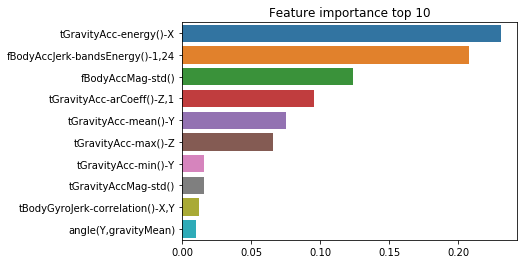

In [48]:
best_dt = gs.best_estimator_
feature_importances = best_dt.feature_importances_
ftr_importances = pd.Series(feature_importances, index=X_train.columns)

ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]

plt.title("Feature importance top 10")
sns.barplot(x=ftr_top10, y=ftr_top10.index)